
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [1]:

import numpy as np
import matplotlib.pyplot as plt


In [2]:

# Implement StandardScaler manually ,  first read about it, how it works and then implement it
class StandardScalerManual:
    def fit(self, X):
        #This will compute mean and std for each feature in datset
        self.mean_=np.mean(X,axis=0)
        self.std_=np.std(X,axis=0)

        #we also need to handle division by zero edge case in std
        self.std_[self.std_==0]=1.0

        return self

    def transform(self, X):
        return (X-self.mean_)/self.std_

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


In [3]:

# Implement Linear Regression from scratch, here you have to also construct the regulization term coefficient of which will be
# denoted by l2_lambda
# try to implement L1 regularization or atlease read about it and where it is used
class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        #Here we just need to store hyperparameters in self
        self.lr=lr
        self.epochs=epochs
        self.l2_lambda=l2_lambda

    def fit(self, X, y):
        num_samples,num_features=X.shape
        self.w=np.zeros(num_features)
        self.b=0.0

        self.loss_hist=[]

        for _ in range(self.epochs):
            y_pred=np.dot(X,self.w)+self.b
            loss=np.mean((y_pred-y)**2)

            #Loss calc using L2 regularization
            l2_loss=self.l2_lambda*np.sum(self.w**2)
            loss+=l2_loss
            self.loss_hist.append(loss)

            #Now cacl gradients
            dw=(2/num_samples)*np.dot(X.T,(y_pred-y))+2*self.l2_lambda*self.w
            db=(2/num_samples)*np.sum(y_pred-y)

            #Gradient descent updating
            self.w-=self.lr*dw
            self.b-=self.lr*db

        return self


    def predict(self, X):
        return np.dot(X,self.w)+self.b


In [4]:
#Lets load dataset now:
#First lets load dataset
num_samples = 50
x_train = np.linspace(0, np.pi/2, num_samples)
y_train = 3*np.sin(3*x_train) + np.random.normal(0, 0.2, num_samples)
X = x_train.reshape(-1, 1)

#Using standard scaler function
scaler=StandardScalerManual()
X_scaled=scaler.fit_transform(X)

model_l_regression=LinearRegressionManual()
model_l_regression.fit(X_scaled,y_train)
y_pred=model_l_regression.predict(X_scaled)

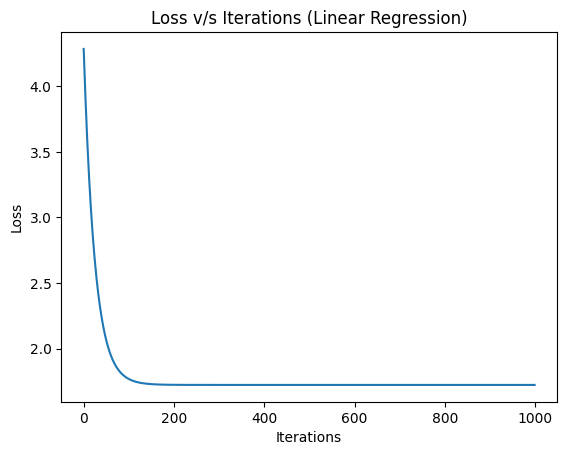

In [5]:
#Now plotting results using functions above
#first plotting loss v/s iterations:
plt.figure()
plt.plot(model_l_regression.loss_hist)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss v/s Iterations (Linear Regression)")
plt.show()



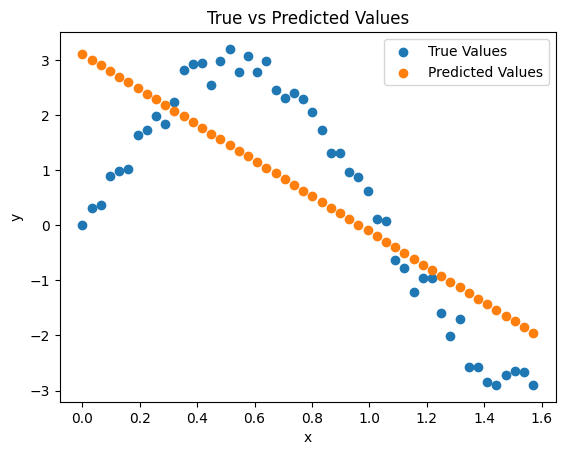

In [6]:
#Plotting true vs pred values, scatter plot is best choice here for visualising
#Note since dataset is actually sinusoidal, our linear model wont be able to fit exactly according to the dataset
plt.figure()
plt.scatter(x_train,y_train,label="True Values")
plt.scatter(x_train,y_pred,label="Predicted Values")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("True vs Predicted Values")
plt.show()



## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [8]:

#Implement sigmoid function as told in the lectures
def sigmoid(z):
    return 1/(1+np.exp(-z))


In [9]:

#Implement Logistic Regression from scratch and here also add the regularizaation term
class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        #Same code as in q1
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda

    def fit(self, X, y):
        num_samples,num_features=X.shape

        self.w=np.zeros(num_features)
        self.b=0.0
        self.loss_hist=[]

        for _ in range(self.epochs):
            #In logistic we must apply activation function to z
            y_pred=sigmoid(np.dot(X,self.w)+self.b)

            #Binary cross entropy loss
            bce_loss=-np.mean(y*np.log(y_pred)+(1-y)*np.log(1-y_pred))
            #L2 loss
            l2_loss=self.l2_lambda*np.sum(self.w**2)
            #total loss:
            loss=bce_loss+l2_loss
            self.loss_hist.append(loss)

            #Gradient calc
            dw=(1/num_samples)*np.dot(X.T,(y_pred-y))+2*self.l2_lambda*self.w
            db=(1/num_samples)*np.sum(y_pred-y)

            #Gradient descent update:
            self.w-=self.lr*dw
            self.b-=self.lr*db

        return self


    def predict_proba(self, X):
        return sigmoid(np.dot(X,self.w)+self.b)

    def predict(self, X):
        preds=self.predict_proba(X)
        #We will keep preds with more than 0.5 probability
        return np.where(preds>=0.5,1,0)


In [10]:
#Now making synthetic binary dataset:
np.random.seed(0)
X=np.random.randn(200,2)
y=(X[:,0]+X[:,1]>0).astype(int)

#Applying standerd scaler from q1
scaler=StandardScalerManual()
X_scaled=scaler.fit_transform(X)

model_log_reg=LogisticRegressionManual()
model_log_reg.fit(X_scaled,y)
y_pred=model_log_reg.predict(X_scaled)

#acuracy will be taken as correct pred/total pred
accuracy=np.mean(y_pred==y)

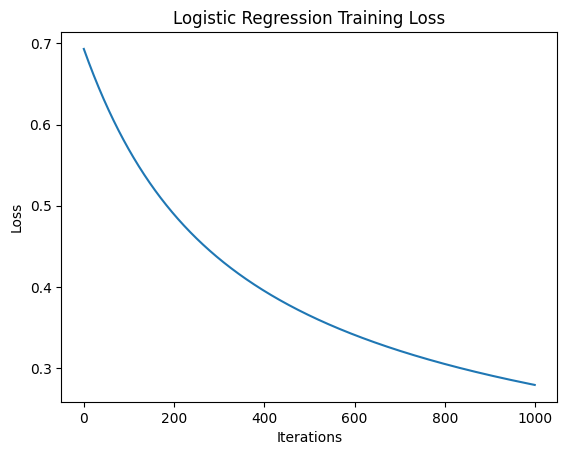

In [11]:
#plotting training loss curve:
plt.figure()
plt.plot(model_log_reg.loss_hist)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Logistic Regression Training Loss")
plt.show()


In [12]:
#Now printing accruacy

print("Training Accuracy:",accuracy)

Training Accuracy: 0.995



## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [13]:
from sklearn.cluster import KMeans

In [ ]:

# Implement K-Means for matrix elements
#CAN USE SK-LEARN FOR THIS TASK AS THIS TASK WILL HELP US DIRECTLY IN OUR PROJECT !
def kmeans_matrix(M, k, max_iters=100):
    '''
    Returns:
    assignment_table: same shape as M, contains cluster labels
    cookbook: dict -> cluster_id : list of (i, j) positions
    centroids: numpy array of centroid values
    '''

    #Will use sklearn for cluster centroid calc

    n,m=M.shape
    #To use kmeans function we need to reshape amtrix, since we have only one feature, which is the value itself
    vals=M.reshape(-1,1)

    kmeans=KMeans(n_clusters=k,max_iter=max_iters,n_init=10,random_state=42)
    kmeans.fit(vals)

    #now making assignment table with cluster labels
    assignment_table=kmeans.labels_.reshape(n,m)

    #Building cookbook dictionary

    cookbook={}
    #First initalising
    for i in range(k):
      cookbook[i]=[]

    for i in range(n):
        for j in range(m):
          c_idx=assignment_table[i,j]
          cookbook[c_idx].append((i,j))

    centroids=kmeans.cluster_centers_.flatten()

    return assignment_table, cookbook, centroids


## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
